In [52]:
# Vehicle detection

In [2]:
import os
import re
import cv2
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

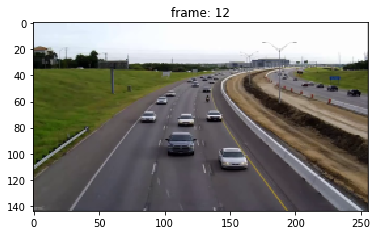

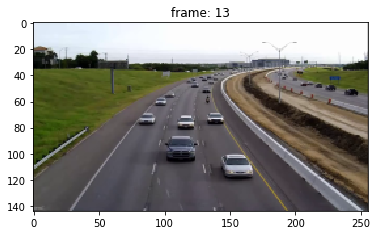

In [12]:
# reading video frames
cam_frames = os.listdir('frames/')

# sorting file names
cam_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

cam_images=[]

for i in cam_frames:
    # read the frames
    img = cv2.imread('frames/'+i)
    # append the frames to the list
    cam_images.append(img)
    
# displaying 2 consecutive frames
i=12
for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(cam_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()


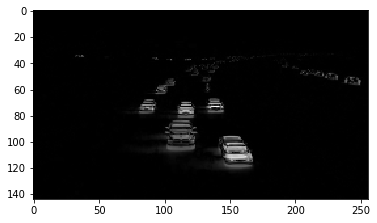

In [13]:
# conversion to gray scale
gray_frame_A = cv2.cvtColor(cam_images[i], cv2.COLOR_BGR2GRAY)
gray_frame_B = cv2.cvtColor(cam_images[i+1], cv2.COLOR_BGR2GRAY)

# plotting the image after 'frame differencing'
plt.imshow(cv2.absdiff(gray_frame_B, gray_frame_A), cmap = 'gray')
plt.show()


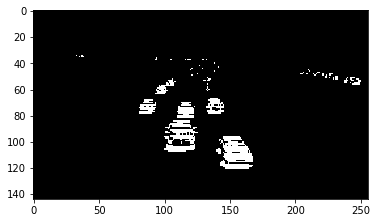

In [14]:
diff_image = cv2.absdiff(gray_frame_B, gray_frame_A)

# performing image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plotting image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

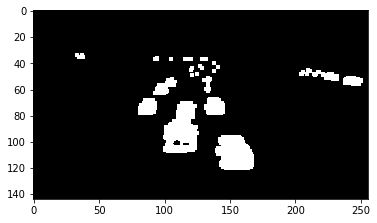

In [30]:
# applying image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations = 1)

# plotting dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

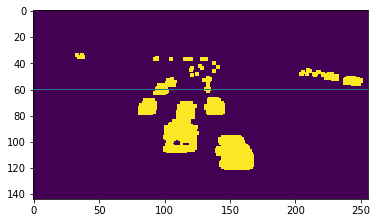

In [32]:
# a vehicle will be detected only when it moves into the zone we have selected for detection
# plotting vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 60),(256,60),(100, 0, 0))
plt.show()

In [28]:
# finding contours for detection
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [34]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 60) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of contours        
len(valid_cntrs)

6

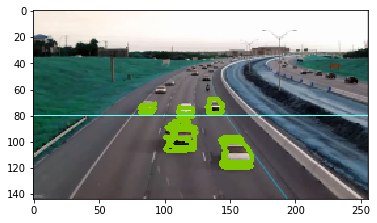

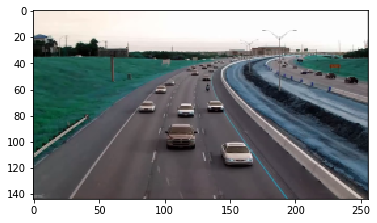

In [37]:
dmy = cam_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
plt.imshow(dmy)
plt.show()
plt.imshow(cam_images[13])
plt.show()

In [43]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "./contour_frames/"

for i in range(len(cam_images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(cam_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(cam_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 60) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = cam_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)

In [44]:
# specifying video name
pathOut = 'vehicle_detection_v3.mp4'

# specifying frames per second
fps = 14.0

frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [45]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [48]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()

In [50]:
# from IPython.display import Video

# Video(pathOut)

In [53]:
# LANE DETECTION